# Design de Filtros Digitais

Filtros são uma classe de sistemas ineares invariantes no tempo particularmente importantes. Em um contexto mais amplo, qualquer sistema que modifique algumas frequências relativamente a outras, é chamado de filtro. Mais estritamente falando, a ênfase primária desse estudo tratará dos filtros **seletores de frequência**, mas as abordagens também podem ser estendidas para apicações mais amplas. Esse estudo se concentrará no design de filtros causais. Em geral, filtros não causais partem do design de filtros causais.
O design de filtros obedecem os seguintes estágios:
1. Especificação das propriedades desejadas do sistema;
2. Aproximação das especificações utilizando um sistema de tempo discreto causal;
3. Construção do sistema.

Nesse estudo, focaremos no segundo passo, uma vez que o primeiro é altamente dependente da aplicação, e o terceiro dependente da tecnologia usada para a implementação. Vale ressaltar que o processamento de sinais discretos no tempo é feito por comuptadores de forma digital, e apesar de que os filtros apresentados aqui tratem apenas da natureza discreta dos sinais e sistemas, comumente nos referimos a esse tipo de filtro como **filtros digitais**.

## 1. Design de Filtros IIR a partir de filtros de tempo contínuo

O design de filtros IIR(*infinite impulse response*) digitais pode ser realizado por meio de aproximações de filtros IIR contínuos, supondo que as especificações do sistema a ser projetoado foram estabelecidas em tempo discreto. Usaremos aproximações para filtros de tempo contínuo apenas por conveniência para determinar as características do filtro digital que compram os requisistos do sistema. De fato, a resposta em frequência do filtro de tempo contínuo que aproximamos pode ser muito diferente da resposta do filtro digital.

O design de filtros digitais obtidos por meio da transformação de filtros contínuos no tempo parte da transformação dos requisitos do sistema para o tempo contínuo, obtemos a resposta $H_c(s)$ e a resposta ao impulso $h_c(t)$ e a partir de uma transformação, obtemos a resposta $H(z)$ e a resposta ao impulso $h[n]$ do sistema discreto. EM geral, requerimos que as propriedades essenciais do sistema contínuo se mantenham no domínio discreto, em outras palavras, desejamos que o eixo imaginário do plano *s* seja mapeado no círculo unitário no plano *z*, e que a estabilidade do sistema contínuo se mantenha no sistema discreto, ou seja, que os polos do sistema no plano *s* estejam à esquerda do eixo imaginário, e sejam mapeados em polos dentro do cículo unitário no plano *z*. Essas exigências são básicas para todas as técnicas que seram discutidas nessa seção.

### 1.1 Design de Filtro por Invariância de Impulso

Na seção 4.42 do livro do Openheim, discute-se o conceito de invariância de impulso, ode um sistema em tempo discreto é definido pela amostragem da resposta ao impuldo de  um sistema de tempo contínuo. A invariância de impulso fornece um meio direto de calcular amostras da saída de um sistema limitado em banda para sinais de entrada limitados em banda. No projeto de filtros, podemos pensar nela como um método para obter um sistema discreto cuja resposta em frequência é determinada pela resposta em frequência de um sistema de tempo contínuo.

Nesse procedimento, a resposta ao impulso do filtro digital é escolhido proporcionalmente a amostras igualmente espaçadas da resposta ao impulso do filtro de tempo contínuo, isto é:

$$
h[n] = T_dh_c(nT_d) \tag{1.1}
$$

Onde $T_d$ é o período de amostragem.

A resposta em frequência do sistema de tempo discreto se relaciona com a respostea em frequência do sistema de tempo contínuo a partir da equação:

$$
H(e^{j\omega}) = \sum_{k=-\infty}^{\infty} H_c \left( \frac{j\omega}{T_d} + \frac{j2\pi k}{T_d} \right) \tag{1.2}
$$

Se o filtro de tempo contínuo for limitado em banda, tal que:

$$
H_c(j\Omega) = 0, \quad |\Omega| \geq \pi / T_d, \tag{1.3}
$$

então:

$$
H(e^{j\omega}) = H_c \left( \frac{j\omega}{T_d} \right), \quad |\omega| \leq \pi; \tag{1.4}
$$

No procedimento  de design por invariância de impulso, a rpiori, as especificações do sistema em tempo discreto são transofrmadas para o tempo contínuo por meio da Eq.(1.2). Assumindo que o *aliasing* envolvido na na transformação de $H_c(j\Omega)$ para $H(e^{j\omega})$ é negligenciado, nós obtemos as especificações em $H_c(j\Omega)$ aplicando a relação:

$$
\Omega = \omega/T_d \tag{1.5}
$$

Após obter um filtro de tempo contínuo aceitável com base nessas especificações, tranformamos a sua resposta em frequência para a resposta em frequência do filtro de tempo discreto, cujos detalhes algébricos serão desenvolvidos brevemente. Note que devido à natureza dessa tranformação, que implica no uso da relação estavelecida na Eq.(1.5), o termo $T_d$ não pode ser usado para controlar o *aliasing*. Uma vez que a frequência de amostragem aumenta, a frequência de corte do filtro de tempo contínuo deve aumentar de forma proporcional. Na prática, para compensar o possível *aliasing* nesa transformação, o filtro de tempo contínuo deve ser superprojetado de alguma maneira, de forma a exceder as especificações, particularmente na faixa de rejeição.

Para desenvolver essa transforamção do tempo contínuo para o tempo discreto, descrevemos a função do sistema de tempo contínuo em termos de uma expansão de frações parciais:

$$
H_c(s) = \sum_{k=1}^{N} \frac{A_k}{s - s_k} \tag{1.6}
$$

A função do filtro de tempo discreto é dada então, por:

$$
H(z) = \sum_{k=1}^{N} \frac{T_d A_k}{1 - e^{s_k T_d} z^{-1}} \tag{1.7}
$$

Note que um polo em $s =  s_k$ é mapeado em $z = e^{s_kT_d}$, o que significa que se o sistema for estável no tempo contínuo, também o será no tempo discreto. Um procedimento mais utilizado, no entanto, porque considera explicitamente os efeitos de *aliasing* no sistema, é o da aproximação Bilinear.

###1.1.2 Aproximação Bilinear

A aproximação bilinear consiste em uma transormação algébrica que mapeia o eixo imaginário no plano *s* no círculo de raio unitário no plano *z*, e o plano esquerdo é mapeado dentro do círculo unitário. Isso implica dizer que caso um sistema possuas os polos no semiplano esquerdo do plano *s*, ele será mapeado dentro do círculo unitário no plano *z*, e será estável em amos os domínios. A função do sistema discreto é dada por:

$$
H(z) =  \frac{2}{T_s}\frac{1-z^{-1}}{1+z^{-1}} \tag{1.8}
$$

Da mesma forma que o pocedimento por invariância de impulso, o termo $T_d$ é mantido durante as discussões. No entanto, como as especificações do proeto são determindas já no domínio discreto, esse termo não é relevante no design de filtros digitais por meio de filtros contínuos. Vale ressalar que devido ao mapeamento dos polos descritos pela Eq.(1.8), a transformação bilinear não sofra por efeitos de *aliasing*, ela mapeia a frequÊncia contínua e frequência discreta de forma não-linear. Ou seja, se desejamos obter um sistema discreto que possua fase linear, não poderemos aplicar essa transformação, uma vez que ela é dada por:

$$
\omega = arctan(\OmegaT_d/2)
$$

Devido a essa característica, o uso da transformação bilinear está restrita à aproxiação de filtros com característicacs constantes e peiódicas, como filtros passa-baixa, passa-alta e passa-banda. O código abaixo calcula a frequência de corte o filtro butterworth analógico que cumpra os requisitos do sistema digital presente no Ex. 7.2 (Oppenheim, 1998). A outra célula plota a resposta em frequência do filtro digital obtido a partir do método bilinear.



In [29]:
import numpy as np
from scipy.optimize import fsolve

def butterworth_solver(fs, at_passband, at_stopband, passband, stopband):
    """
    Calcula a ordem do filtro (N) e a frequência de corte (Omega_c) para um filtro Butterworth analógico.

    Parâmetros:
        fs (float): Frequência de amostragem.
        at_passband (float): Atenuação na banda de passagem (linear).
        at_stopband (float): Atenuação na banda de rejeição (linear).
        passband (float): Frequência de passagem normalizada (0 a 0.5).
        stopband (float): Frequência de rejeição normalizada (0 a 0.5).

    Retorna:
        tuple: Ordem do filtro (N) e frequência de corte (Omega_c).
    """

    def butterworth_equations(vars):
        N, Omega_c = vars
        # Garantir que Omega_c não seja zero ou negativo
        if Omega_c <= 0:
            return [np.inf, np.inf]

        # Transformação bilinear para frequências analógicas
        passband_analog = fs*passband
        stopband_analog = fs*stopband

        # Equações baseadas na equação 7.16
        eq1 = 1 / np.sqrt(1 + (passband_analog/ Omega_c)**(2 * N)) - at_passband
        eq2 = 1 / np.sqrt(1 + (stopband_analog / Omega_c)**(2 * N)) - at_stopband
        return [eq1, eq2]

    # Palpite inicial refinado
    initial_guess = [2, 1]

    # Solução numérica usando fsolve
    solution = fsolve(butterworth_equations, initial_guess)
    N, Omega_c = solution

    # Validar resultados e arredondar N
    if Omega_c <= 0 or N <= 0:
        raise ValueError("Solução inválida encontrada. Verifique os parâmetros iniciais ou equações.")
    
    N = int(np.ceil(N))  # Arredondar ordem para cima
    return N, Omega_c

# Parâmetros do sistema
fs = 1
at_passband = 0.89125
at_stopband = 0.17783
passband = 0.2*np.pi
stopband = 0.3*np.pi

# Executar o cálculo para obter N e Omega_c
try:
    N, Omega_c = butterworth_solver(fs, at_passband, at_stopband, passband, stopband)
    print(f"Ordem do filtro (N): {N}")
    print(f"Frequência de corte (Omega_c): {Omega_c:.5f}")
except ValueError as e:
    print(e)


Ordem do filtro (N): 6
Frequência de corte (Omega_c): 0.70474


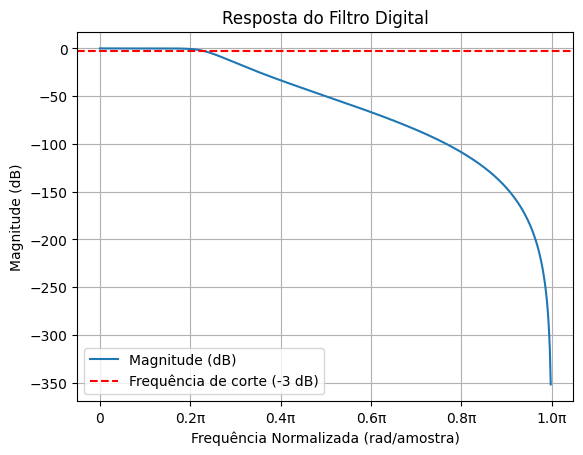

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, bilinear, freqs

order = 6
omega_c = 0.766
fs = 1000

# Filtro analógico Butterworth
num, den = butter(order, omega_c, btype='low', analog=True)
freq, h_s = freqs(num, den)

num_z, den_z = bilinear(num, den)
w, h_z = freqz(num_z, den_z)

# Plot da resposta
plt.figure()
plt.plot(w, 20 * np.log10(abs(h_z)), label="Magnitude (dB)")
plt.title('Resposta do Filtro Digital')
plt.xlabel('Frequência Normalizada (rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.axhline(-3, color='red', linestyle='--', label='Frequência de corte (-3 dB)')
plt.legend()

ticks = np.linspace(0, np.pi, 6)  # 6 divisões uniformes de 0 a pi
tick_labels = [f"{tick/np.pi:.1f}π" if tick != 0 else "0" for tick in ticks]
plt.xticks(ticks, tick_labels)

plt.show()






## Design de filtros FIR por janelamento


